In [2]:
import numpy as np
import pandas as pd
import os

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
# 클러스터링을 위한 Tfidf 임포트
from sklearn.feature_extraction.text import TfidfVectorizer

#k개의 클러스터로 묶기 위해 거리 차이의 분산을 최소화하는 방식의 알고리즘
from sklearn.cluster import MiniBatchKMeans

#고차원 데이터를 시각화하거나 차원을 줄여 알고리즘의 속도를 높이는 방법
from sklearn.decomposition import PCA

#여러 언어의 자연어 처리에 대해 사전 학습된 모델과 학습할 수 있는 도구
import spacy

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [5]:
#html태그, 특수문자, 스탑워즈 제거 등을 위한 전처리 라이브러리
from dataprep import clean

In [6]:
file = 'chatgpt-reddit-comments.csv'

In [7]:
df = pd.read_csv(file, usecols = ['comment_body'])

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df=clean.clean_text(df, 'comment_body')

/Users/kmj/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:6973: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/Users/kmj/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:6973: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/Users/kmj/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py:6973: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the colu

In [16]:
pip install sapcy

ERROR: Could not find a version that satisfies the requirement sapcy (from versions: none)
ERROR: No matching distribution found for sapcy
Note: you may need to restart the kernel to use updated packages.


In [11]:
# parser, ner 파라미터를 비활성화하여서 모델이 더 빠르고 메모리 효율을 높여서 처리 하도록 함
lem = spacy.load('en_core_web_sm', disable = ['parser','ner'])

In [12]:
def lemmetize(txt):
    # 먼저 입력된 텍스트에서 토큰화, 품사 태깅, 의존성 구문 분석 등 자연어 처리 기술을 적용
    doc = lem(txt)
    # toekn.lemma_를 적용. 각 단어를 기본형식으로 줄임.
    return (" ".join([token.lemma_ for token in doc]))

In [13]:
df['comment_body'] = df['comment_body'].apply(lambda x: lemmetize(x))

In [15]:
import pickle

In [16]:
with open('df.pickle', 'wb') as f:
    pickle.dump(df, f)

In [17]:
df.head()

,comment_body
0,shocked day need clickbait
1,angry right waste time read post sub clickbait...
2,chatgpt karma whore folk think stream think bu...
3,work ngl
4,certify must see moment really shock core


---

In [18]:
vec = TfidfVectorizer(stop_words='english')
vec.fit(df.comment_body.values)
features = vec.transform(df.comment_body.values)

In [19]:
cls = MiniBatchKMeans(n_clusters=3, random_state=0)
cls.fit(features)

MiniBatchKMeans(n_clusters=3, random_state=0)

In [20]:
pred = cls.predict(features)

---

In [21]:
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

In [22]:
red_cluster_centers = pca.transform(cls.cluster_centers_)

---

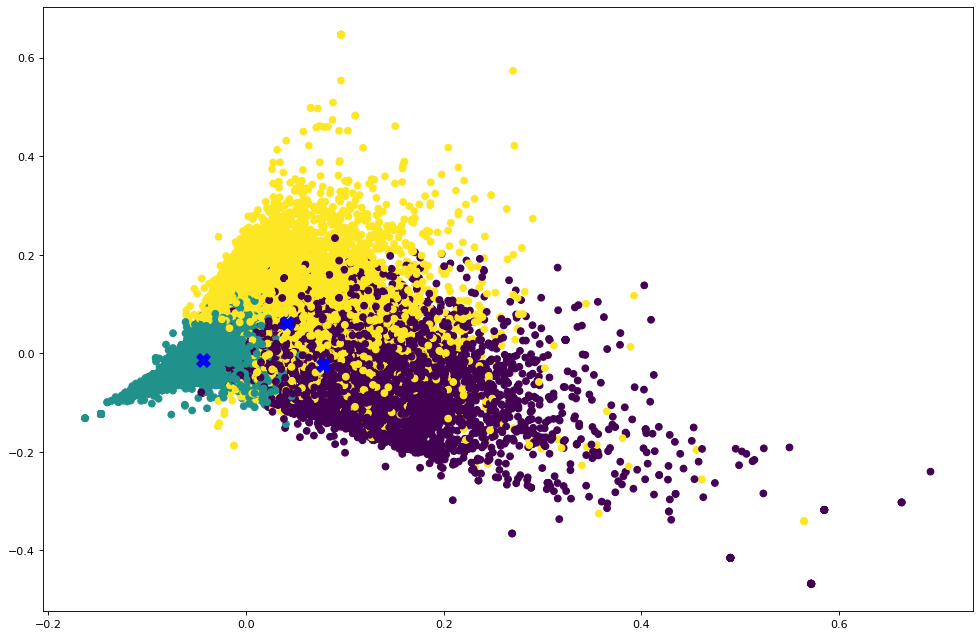

In [23]:
plt.figure(figsize=(15,10), dpi=80)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=pred)
plt.scatter(red_cluster_centers[:,0], red_cluster_centers[:,1], marker='X', s=150, c='b')
plt.show()